In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-progression-b2/sample_submission.csv
/kaggle/input/diabetes-progression-b2/train.csv
/kaggle/input/diabetes-progression-b2/test.csv


In [2]:

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

traindf= pd.read_csv("/kaggle/input/diabetes-progression-b2/train.csv")

X_train=traindf[['ID','age','sex','bmi','bp','s1','s2','s3','s5','s6']]
print(X_train)
Y_train=traindf[['y']]

      ID       age       sex       bmi        bp        s1        s2  \
0      1 -0.023677 -0.044642 -0.015906 -0.012556  0.020446  0.041274   
1      2 -0.099961 -0.044642 -0.067641 -0.108957 -0.074494 -0.072712   
2      3  0.048974  0.050680 -0.030996 -0.049280  0.049341 -0.004132   
3      4 -0.085430  0.050680 -0.022373  0.001215 -0.037344 -0.026366   
4      5 -0.078165 -0.044642 -0.040696 -0.081414 -0.100638 -0.112795   
..   ...       ...       ...       ...       ...       ...       ...   
383  384  0.045341 -0.044642 -0.006206 -0.015999  0.125019  0.125198   
384  385 -0.027310  0.050680 -0.007284 -0.040099 -0.011201 -0.013840   
385  386 -0.052738 -0.044642  0.071397 -0.074528 -0.015328 -0.001314   
386  387  0.067136  0.050680 -0.025607 -0.040099 -0.063487 -0.059873   
387  388 -0.020045 -0.044642  0.097264 -0.005671 -0.005697 -0.023861   

           s3        s5        s6  
0   -0.043401  0.014072 -0.009362  
1    0.015505 -0.049868 -0.009362  
2    0.133318  0.021311  0.

In [3]:
testdf_1=pd.read_csv("/kaggle/input/diabetes-progression-b2/test.csv")
testdf=testdf_1[['ID','age','sex','bmi','bp','s1','s2','s3','s5','s6']]
print(testdf)
testid=testdf[['ID']]

    ID       age       sex       bmi        bp        s1        s2        s3  \
0    1 -0.023677 -0.044642  0.030440 -0.005671  0.082364  0.092004 -0.017629   
1    2  0.005383 -0.044642  0.059541 -0.056166  0.024574  0.052861 -0.043401   
2    3  0.012648 -0.044642  0.033673  0.033349  0.030078  0.027183 -0.002903   
3    4  0.009016 -0.044642 -0.032073 -0.026328  0.042462 -0.010395  0.159089   
4    5  0.023546  0.050680 -0.030996 -0.005671 -0.016704  0.017788 -0.032356   
5    6  0.063504  0.050680 -0.025607  0.011544  0.064477  0.048477  0.030232   
6    7 -0.041840 -0.044642  0.041218 -0.026328 -0.031840 -0.030437 -0.036038   
7    8  0.070769 -0.044642  0.069241  0.037939  0.021822  0.001504 -0.036038   
8    9  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
9   10  0.012648 -0.044642 -0.025607 -0.040099 -0.030464 -0.045155  0.078093   
10  11 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
11  12 -0.027310 -0.044642 -0.035307 -0.

In [4]:
from sklearn.model_selection import cross_val_score
linreg=LinearRegression()
lin_score=cross_val_score(linreg,X_train,Y_train,cv=9,scoring="neg_mean_absolute_error")
lin_score_n = -lin_score
np.mean(lin_score_n)

42.89881757009937

/tmp/ipykernel_20/1984132077.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


[0.11227182 0.10626561 0.02319754 0.11024843 0.10882787 0.1080059
 0.10360884 0.10863501 0.11055497 0.10838401]


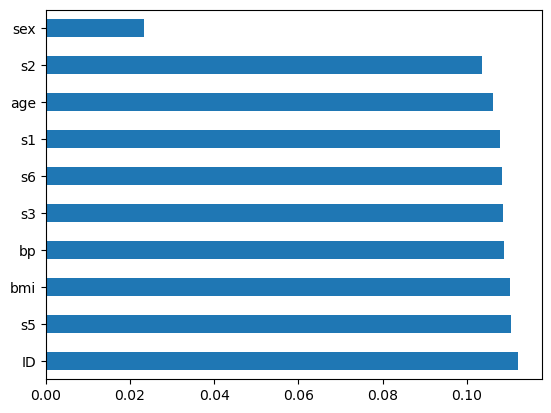

In [5]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [6]:
linreg.fit(X_train,Y_train)
prediction=linreg.predict(testdf)
output_list=[]
sumx=0
for i in prediction:
    for j in i:
        sumx=sumx+1
        output_list.append(j)
output=pd.DataFrame({'ID':testdf.ID, 'y':output_list})
output
output.to_csv('submission.csv', index=False)